# Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl -L -o leukemia.zip https://www.kaggle.com/api/v1/datasets/download/mehradaria/leukemia
!unzip leukemia.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  110M  100  110M    0     0  82.5M      0  0:00:01  0:00:01 --:--:--  117M


# Memisahkan data train, val dan test ke dalam masing-masing folder

In [ ]:
import os
import shutil
import random

# Parameters
input_dir = 'Original'  # Input directory with original dataset
output_dir = 'dataset'  # Output directory for the new structure
os.makedirs(output_dir, exist_ok=True)
split_ratios = (0.8, 0.1, 0.1)  # Ratios for train, val, and test splits

# Ensure output directories exist
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

# Get all class folders
classes = os.listdir(input_dir)

for class_name in classes:
    class_path = os.path.join(input_dir, class_name)
    images = os.listdir(class_path)

    # Shuffle images
    random.shuffle(images)

    # Compute split sizes
    total_images = len(images)
    print(total_images)
    train_end = int(split_ratios[0] * total_images)
    val_end = train_end + int(split_ratios[1] * total_images)

    # Split images
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Create class directories in output directories
    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)

    # Move images to respective directories
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'train', class_name, img))
    for img in val_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'val', class_name, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'test', class_name, img))

print("Dataset split completed.")


804
963
985
504
Dataset split completed.


In [ ]:
!cp -r dataset_09-11-2024 /content/drive/MyDrive/SKRIPSI

# CLAHE preprocessing

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

dataset_path = '/content/drive/MyDrive/SKRIPSI/dataset/clahe'

os.makedirs(os.path.join(dataset_path, 'clahe'), exist_ok=True)

for set_data in os.listdir(os.path.join(dataset_path, 'original')): # Train, val, test

    os.makedirs(os.path.join(dataset_path, 'clahe', set_data), exist_ok=True)
    for clas in os.listdir(os.path.join(dataset_path, 'original', set_data)): # early, benign, pre, pro

        os.makedirs(os.path.join(dataset_path, 'clahe', set_data, clas), exist_ok=True)
        for img in os.listdir(os.path.join(dataset_path, 'original', set_data, clas)): # file name

            img_path = os.path.join(dataset_path, 'original', set_data, clas, img)

            image = cv2.imread(img_path)
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)

            l = clahe.apply(l)

            lab = cv2.merge([l, a, b])

            image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            cv2.imwrite(
                filename=os.path.join(
                    dataset_path, 'clahe', set_data, clas, img
                ),
                img=image
            )

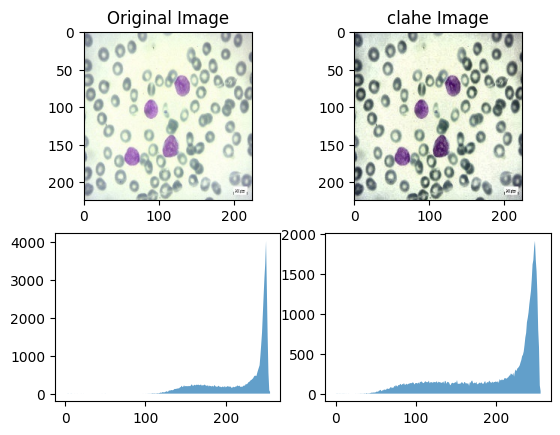

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load the image in grayscale
fig, axs = plt.subplots(nrows=2, ncols=2)

original_image_path = '/content/drive/MyDrive/SKRIPSI/dataset/original/train/Pro/WBC-Malignant-Pro-010.jpg'  # Replace with your image file path
image = cv2.imread(original_image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

axs[0][0].imshow(image)
axs[0][0].set_title('Original Image')

histogram, bins = np.histogram(grayscale.ravel(), bins=256, range=[0, 256])
axs[1][0].fill_between(np.arange(256), 0, histogram, alpha=0.7)


# clahe_image_path = '/content/drive/MyDrive/SKRIPSI/dataset/clahe/train/Benign/WBC-Benign-001.jpg'  # Replace with your image file path
clahe_image_path = '/content/drive/MyDrive/SKRIPSI/dataset/clahe/train/Pro/WBC-Malignant-Pro-010.jpg'  # Replace with your image file path
image = cv2.imread(clahe_image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

axs[0][1].imshow(image)
axs[0][1].set_title('clahe Image')

histogram, bins = np.histogram(grayscale.ravel(), bins=256, range=[0, 256])
axs[1][1].fill_between(np.arange(256), 0, histogram, alpha=0.7)


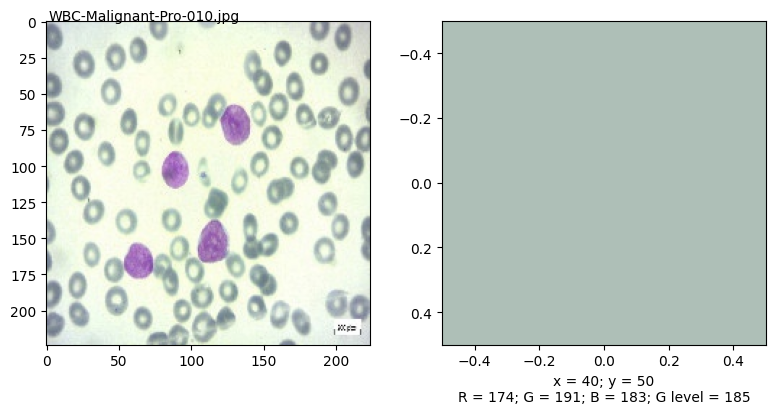

In [ ]:
import matplotlib.pyplot as plt
import cv2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

image_path = '/content/drive/MyDrive/SKRIPSI/dataset/original/train/Pro/WBC-Malignant-Pro-010.jpg'  # Replace with your image file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

axs[0].imshow(image)
axs[0].text(1, 1, 'WBC-Malignant-Pro-010.jpg', fontsize=10, va='bottom')

y = 50
x = 40
axs[1].imshow([[image[y][x]]])

axs[1].set_xlabel(
    'x = {}; y = {}\nR = {}; G = {}; B = {}; G level = {}'.format(
        x, y,
        image[y][x][0],
        image[y][x][1], image[y][x][2],
        int(0.299 * image[y][x][0] + 0.587 * image[y][x][1] + 0.114 * image[y][x][2])
    ),
    fontsize=10
)

fig.tight_layout()
plt.show()